In [1]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

In [2]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.0.1


In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

# Data

See other notebooks for details about data preparation.

In [4]:
df = pd.read_pickle('fulldataframe.pkl')
df

,date,LosAngelesCA,NewYorkNY,RaleighNC,OklahomaCityOK,SaltLakeCityUT,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,LosAngelesUnemployment,NewYorkUnemployment,RaleighUnemployment,SaltLakeCityUnemployment,OklahomaCityUnemployment
0,2000-01-31,240598.0,226266.0,176753.0,91918.0,190020.0,8.25,2.785584,82.0,67.0,5.1,5.1,2.5,3.1,2.9
1,2000-02-29,241457.0,227618.0,176909.0,92156.0,190141.0,8.31,3.416809,79.0,78.0,5.1,5.0,2.6,3.4,3.0
2,2000-03-31,242727.0,228829.0,177351.0,92378.0,190386.0,8.23,2.276901,86.0,88.0,5.1,4.8,2.4,3.3,2.8
3,2000-04-30,245142.0,231213.0,178077.0,92742.0,190866.0,8.13,2.853534,80.0,78.0,5.1,4.1,2.0,2.9,2.2
4,2000-05-31,247707.0,233418.0,179033.0,93124.0,193543.0,8.62,3.142535,84.0,77.0,5.1,4.3,2.5,3.0,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-07-31,988839.0,620305.0,462448.0,220174.0,625456.0,5.30,9.222973,43.0,44.0,4.3,4.7,3.1,2.1,2.9
271,2022-08-31,973842.0,622586.0,459364.0,221448.0,611770.0,5.55,8.307776,46.0,51.0,4.1,4.9,3.3,2.1,3.1
272,2022-09-30,963691.0,623535.0,454956.0,222529.0,606227.0,6.70,6.532852,55.0,45.0,4.1,3.7,2.8,1.9,3.1
273,2022-10-31,953568.0,623959.0,452496.0,223638.0,602751.0,7.08,5.609658,59.0,45.0,4.0,3.7,3.3,2.1,3.3


In [5]:
standard_features = ['date', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale', 'HomesSold']

la_df = df[standard_features + ['LosAngelesCA', 'LosAngelesUnemployment']]
la_df.set_index('date', inplace=True)
la_df

,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,LosAngelesCA,LosAngelesUnemployment
date,,,,,,
2000-01-31,8.25,2.785584,82.0,67.0,240598.0,5.1
2000-02-29,8.31,3.416809,79.0,78.0,241457.0,5.1
2000-03-31,8.23,2.276901,86.0,88.0,242727.0,5.1
2000-04-30,8.13,2.853534,80.0,78.0,245142.0,5.1
2000-05-31,8.62,3.142535,84.0,77.0,247707.0,5.1
...,...,...,...,...,...,...
2022-07-31,5.30,9.222973,43.0,44.0,988839.0,4.3
2022-08-31,5.55,8.307776,46.0,51.0,973842.0,4.1
2022-09-30,6.70,6.532852,55.0,45.0,963691.0,4.1


In [6]:
sample_df = la_df[['LosAngelesCA', 'LosAngelesUnemployment']]
sample_df

,LosAngelesCA,LosAngelesUnemployment
date,,
2000-01-31,240598.0,5.1
2000-02-29,241457.0,5.1
2000-03-31,242727.0,5.1
2000-04-30,245142.0,5.1
2000-05-31,247707.0,5.1
...,...,...
2022-07-31,988839.0,4.3
2022-08-31,973842.0,4.1
2022-09-30,963691.0,4.1


In [7]:
data = pd.concat([sample_df['LosAngelesCA'].diff().dropna(), 
                  sample_df.drop(['LosAngelesCA'], axis=1).iloc[1:,:]], axis=1)
data.head(10)

,LosAngelesCA,LosAngelesUnemployment
date,,
2000-02-29,859.0,5.1
2000-03-31,1270.0,5.1
2000-04-30,2415.0,5.1
2000-05-31,2565.0,5.1
2000-06-30,2432.0,5.0
2000-07-31,2497.0,5.0
2000-08-31,2615.0,4.9
2000-09-30,2486.0,4.8
2000-10-31,2272.0,4.8


# Frequentist VAR

We will verify our implementation of BVAR by comparing it to the frequentist VAR implemented in statsmodels.

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [9]:
model = VAR(data)

/opt/homebrew/Caskroom/miniforge/base/envs/bayes/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [10]:
results=model.fit(maxlags=2)

In [11]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Jan, 2023
Time:                     14:48:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.6921
Nobs:                     272.000    HQIC:                   14.6127
Log likelihood:          -2741.99    FPE:                2.10434e+06
AIC:                      14.5595    Det(Omega_mle):     2.02905e+06
--------------------------------------------------------------------
Results for equation LosAngelesCA
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                          -196.819089       348.305472           -0.565           0.572
L1.LosAngelesCA                   1.169769         0.058097           20.135           0.000
L1.Lo

# Bayesian VAR

In [12]:
class BVAR:
    def __init__(self, df, lags=1, intercept_mean = 0, intercept_std = 10, 
                                   lag_mean=0, lag_std=10, noise_std=10, 
                                   minimal_noise = False):
        self.data = df
        self.trace = None
        
        coords = {
            "lags": reversed(range(-lags, 0)),
            "vars": list(df.columns),
            "cross_vars": list(df.columns),
            "time": range(len(df) - lags),
        }
        
        self.model = pm.Model(coords=coords)
        
        with self.model:
            # Define priors for intercepts, lag coefficients, and noise
            intercept = pm.Normal("intercept", mu=intercept_mean, sigma=intercept_std, dims=("vars",))
            lag_coefs = pm.Normal("lag_coefs", mu=lag_mean, sigma=lag_std, dims=("lags", "vars", "cross_vars"))
            noise = pm.HalfNormal("noise", sigma=noise_std, dims=("vars",))

            # Define priors for autoregression expectations
            ar_terms = []

            for j in range(len(df.columns)):
                # for each variable, convolve its matrix of lag coefficients over the dataframe
                # inner sum sums across variables, outer sum sums across lags
                ar = pm.math.sum([
                    pm.math.sum(lag_coefs[i, j] * df.values[lags-(i+1): -(i+1)], axis=1)
                    for i in range(lags)
                ], axis=0)
                ar_terms.append(ar)

            # Add intercept terms to autoregression expectations
            mean = intercept + pm.math.stack([ar for ar in ar_terms], axis=-1)

            # Define our observed stochastic variable. Restrict to observations that have lags available.
            noise_term = 1 if minimal_noise else noise
            obs = pm.Normal("obs", mu=mean, sigma=noise_term, observed=df[lags:], dims=("time", "vars"))
    
    def fit(self, draws=2000, tune=2000, chains=4, random_seed=None):
        with self.model:
            self.trace = pm.sample(draws=draws, tune=tune, chains=chains, random_seed=random_seed)
            
    def get_trace(self):
        if self.trace is not None:
            return self.trace
        else:
            raise Exception('Model not fitted. Fit model before proceeding.')
            
    def summary(self):
        if self.trace is None:
            raise Exception('Model not fitted. Fit model before proceeding.')
        
        return az.summary(self.trace)
    
    def plot_trace(self):
        if self.trace is None:
            raise Exception('Model not fitted. fit model before proceeding.')
        az.plot_trace(self.trace, compact=False)

In [13]:
BVAR_model = BVAR(data, lags=2)
BVAR_model.fit(random_seed=rng)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, lag_coefs, noise]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 20 seconds.


The below plots show the posterior distributions over the model's parameters. The naming convention  for lag coefficients uses a negative number to indicate the number of lags, then the dependent variable, then the independnet variable. For example: "-2, LosAngelesCA, LosAngelesUnemployment" is the label for the coefficient for how much LosAngelesCA is impacted by the value of LosAngelesUnemployment two timesteps prior.

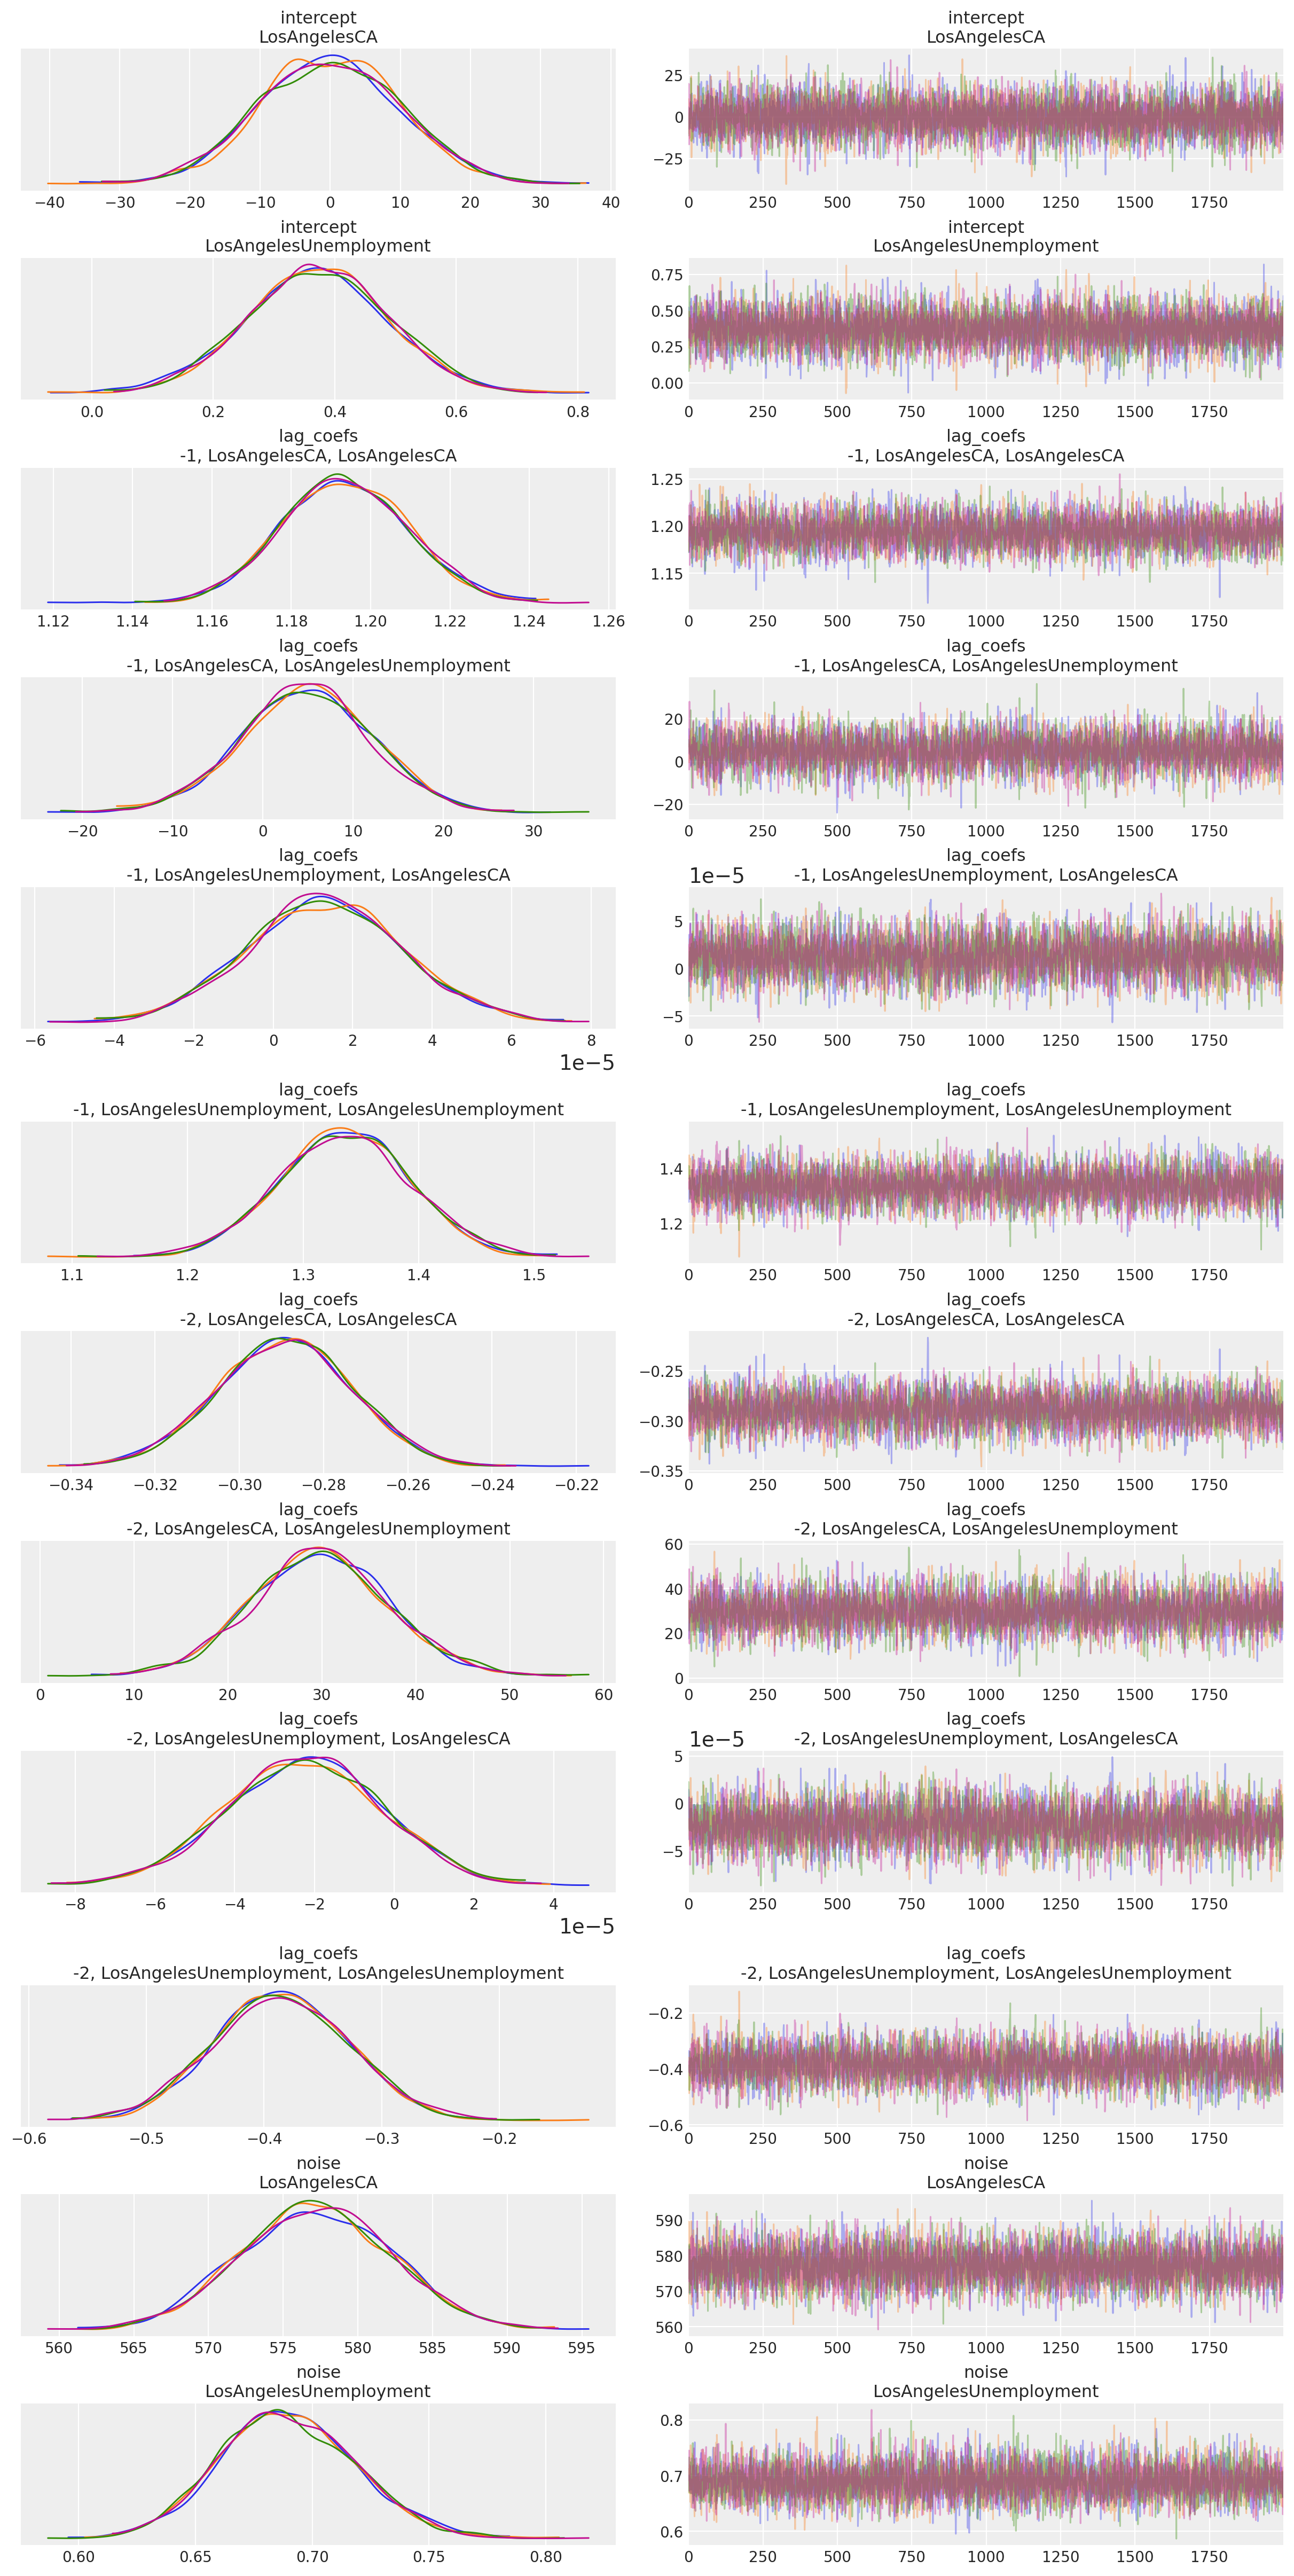

In [14]:
BVAR_model.plot_trace()

The below table summarizes the posterior distributions over the parameters. The coefficients for LosAngelesCA's dependence on LosAngelesUnemployment differ significantly from the frequentist estimation. We will show below that this is attributable to the inclusion of noise at the observation-level in our model.

In [15]:
BVAR_model.summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept[LosAngelesCA],-0.098,10.082,-18.675,18.909,0.105,0.121,9150.0,6137.0,1.0
intercept[LosAngelesUnemployment],0.372,0.116,0.163,0.600,0.001,0.001,8816.0,5926.0,1.0
"lag_coefs[-1, LosAngelesCA, LosAngelesCA]",1.193,0.016,1.164,1.224,0.000,0.000,5436.0,5195.0,1.0
"lag_coefs[-1, LosAngelesCA, LosAngelesUnemployment]",4.812,7.289,-8.612,18.909,0.097,0.073,5638.0,5388.0,1.0
"lag_coefs[-1, LosAngelesUnemployment, LosAngelesCA]",0.000,0.000,-0.000,0.000,0.000,0.000,5449.0,5320.0,1.0
"lag_coefs[-1, LosAngelesUnemployment, LosAngelesUnemployment]",1.336,0.056,1.228,1.440,0.001,0.001,5547.0,5500.0,1.0
"lag_coefs[-2, LosAngelesCA, LosAngelesCA]",-0.289,0.016,-0.318,-0.259,0.000,0.000,5498.0,5038.0,1.0
"lag_coefs[-2, LosAngelesCA, LosAngelesUnemployment]",29.769,7.321,16.220,43.856,0.097,0.070,5667.0,5858.0,1.0
"lag_coefs[-2, LosAngelesUnemployment, LosAngelesCA]",-0.000,0.000,-0.000,0.000,0.000,0.000,5336.0,5311.0,1.0
"lag_coefs[-2, LosAngelesUnemployment, LosAngelesUnemployment]",-0.386,0.057,-0.496,-0.286,0.001,0.001,5637.0,5500.0,1.0


The below experiment demonstrates that the difference between the above results and the frequentist estimation is due to the inclusion of sampling noise in the model. (For context, we must include sampling noise in the Bayesian model in order for the MCMC algorithm to work. See [this thread](https://discourse.pymc.io/t/observed-deterministic/483/10) for details. Instead of using no noise, our Bayesian model includes an option for minimal noise with standard deviation of 1.) The similarity of estimated parameters verifies our implementation of our BVAR model.

In [16]:
BVAR_minnoise = BVAR(data, lags=2, minimal_noise=True)
BVAR_minnoise.fit(random_seed=rng)
BVAR_minnoise.summary()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, lag_coefs, noise]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 38 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept[LosAngelesCA],-196.765,0.170,-197.086,-196.450,0.002,0.001,8800.0,5592.0,1.0
intercept[LosAngelesUnemployment],0.377,0.171,0.058,0.689,0.002,0.001,7876.0,5366.0,1.0
"lag_coefs[-1, LosAngelesCA, LosAngelesCA]",1.170,0.000,1.170,1.170,0.000,0.000,6003.0,5326.0,1.0
"lag_coefs[-1, LosAngelesCA, LosAngelesUnemployment]",-542.698,0.082,-542.852,-542.543,0.001,0.001,5968.0,4812.0,1.0
"lag_coefs[-1, LosAngelesUnemployment, LosAngelesCA]",0.000,0.000,-0.000,0.000,0.000,0.000,6455.0,5541.0,1.0
"lag_coefs[-1, LosAngelesUnemployment, LosAngelesUnemployment]",1.335,0.082,1.188,1.493,0.001,0.001,5665.0,4921.0,1.0
"lag_coefs[-2, LosAngelesCA, LosAngelesCA]",-0.272,0.000,-0.272,-0.272,0.000,0.000,6113.0,5447.0,1.0
"lag_coefs[-2, LosAngelesCA, LosAngelesUnemployment]",607.097,0.082,606.938,607.248,0.001,0.001,5940.0,5310.0,1.0
"lag_coefs[-2, LosAngelesUnemployment, LosAngelesCA]",-0.000,0.000,-0.000,0.000,0.000,0.000,6526.0,5583.0,1.0
"lag_coefs[-2, LosAngelesUnemployment, LosAngelesUnemployment]",-0.386,0.082,-0.534,-0.225,0.001,0.001,5617.0,4938.0,1.0
